
# Use activator

In [6]:
# this is using the 
# https://github.com/openmc-dev/openmc/pull/2755
openmc.__version__

'0.14.0-dev'

In [7]:
import pickle
import numpy as np
import openmc
import openmc.deplete
import math

# data from FNS dataset
data = pickle.load(open('./irradiation_setup.pkl', 'rb'))
ebins = data['ebins']
fluxes = data['fluxes']

fispact_result_dict = pickle.load(open('fispact_result_dict.pkl', 'rb'))
fr = fispact_result_dict['Ag']['2000exp_5min']

# set your config files
openmc.config['chain_file'] = '/home/4ib/git/fermi/fermi/data/openmc/chain_endf_b8.0.xml'
openmc.config['chain_file'] = '/home/4ib/Downloads/chain_endfb71_pwr.xml'
openmc.config['cross_sections'] = '/home/4ib/git/openmc/data/endfb71_hdf5/cross_sections.xml'

from openmc_activator import OpenmcActivator
obj = OpenmcActivator(ebins[::-1], fluxes[::-1])

          1200K
          2500K
          1200K
          2500K
          1200K
          2500K
          2500K
          1200K
          2500K
          1200K
          2500K
          1200K


In [8]:
timesteps = np.array(data['days_list'])
# to dt
timesteps = [timesteps[0]] + list(timesteps[1:] - timesteps[:-1])
source_rates = np.array(data['flux_mag_list'])

In [9]:

# makes a simple material from Silver
# dummy material (FNS uses a gram of silver)
# with density 10.49 g/cc
my_material = openmc.Material() 
my_material.add_element('Ag', 1, percent_type='ao')
#my_material.set_density('g/cm3', 10.49)
#my_material.volume = 1/10.49
my_material.set_density('g/cm3', 1)
my_material.volume = 1
my_material.depletable=True

In [10]:
metric_dict = obj.activate(my_material, source_rates, timesteps,
                           metric_list=['mass','decay_heat'],
                           split_irr=10)

[openmc.deplete] t=0.0 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=29.999999999999996 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=59.99999999999999 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=89.99999999999999 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=119.99999999999999 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=149.99999999999997 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=179.99999999999997 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=209.99999999999997 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=239.99999999999997 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=269.99999999999994 s, dt=29.999999999999996 s, source=11160000000.0
[openmc.deplete] t=299.99999999999994 s, dt=50.0 s, source=0.0
[openmc.deplete] t=349.99999999999994 s, dt=15.000000000000021 s, source=0.0
[openmc

/home/4ib/anaconda3/envs/dev_openmc/lib/python3.12/site-packages/openmc/deplete/results.py:91: FutureWarning: The ResultsList.from_hdf5(...) method is no longer necessary and will be removed in a future version of OpenMC. Use Results(...) instead.
  warn(


In [11]:
metric_dict2 = obj.activate(my_material, source_rates, timesteps,
                           metric_list=['mass','decay_heat'])

[openmc.deplete] t=0.0 s, dt=300.0 s, source=11160000000.0
[openmc.deplete] t=300.0 s, dt=50.0 s, source=0.0
[openmc.deplete] t=350.0 s, dt=15.000000000000021 s, source=0.0
[openmc.deplete] t=365.0 s, dt=15.000000000000021 s, source=0.0
[openmc.deplete] t=380.0 s, dt=15.000000000000021 s, source=0.0
[openmc.deplete] t=395.0 s, dt=25.999999999999993 s, source=0.0
[openmc.deplete] t=421.0 s, dt=36.00000000000001 s, source=0.0
[openmc.deplete] t=457.0 s, dt=36.00000000000001 s, source=0.0
[openmc.deplete] t=493.0 s, dt=51.999999999999986 s, source=0.0
[openmc.deplete] t=545.0 s, dt=65.99999999999997 s, source=0.0
[openmc.deplete] t=611.0 s, dt=66.00000000000006 s, source=0.0
[openmc.deplete] t=677.0 s, dt=93.99999999999996 s, source=0.0
[openmc.deplete] t=771.0 s, dt=127.00000000000001 s, source=0.0
[openmc.deplete] t=898.0 s, dt=123.00000000000004 s, source=0.0
[openmc.deplete] t=1021.0 s, dt=186.99999999999994 s, source=0.0
[openmc.deplete] t=1208.0 s, dt=243.00000000000006 s, source=0.

/home/4ib/anaconda3/envs/dev_openmc/lib/python3.12/site-packages/openmc/deplete/results.py:91: FutureWarning: The ResultsList.from_hdf5(...) method is no longer necessary and will be removed in a future version of OpenMC. Use Results(...) instead.
  warn(


Text(0.5, 1.0, 'Ag')

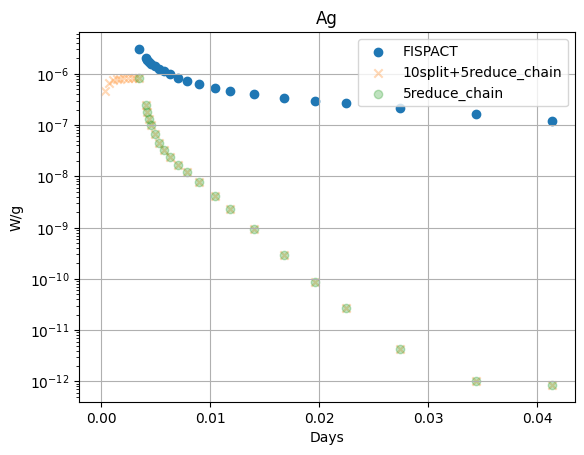

In [13]:
import matplotlib.pyplot as plt
# fispact only has just decay
plt.scatter(data['days_list'][0] + np.array(fr['time']) * 365.25, fr['Total'], label='FISPACT')

plt.scatter(np.cumsum(metric_dict['decay_heat']['meta_days']), metric_dict['decay_heat']['meta_total'], label='10split+5reduce_chain', marker='x', alpha=0.3)
plt.scatter(np.cumsum(metric_dict2['decay_heat']['meta_days']), metric_dict2['decay_heat']['meta_total'], label='5reduce_chain', marker='o', alpha=0.3)
plt.legend()
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('W/g')
plt.grid()
plt.title('Ag')